In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
load_dotenv("my_keys.env")

True

In [3]:
alpaca_api_key = os.getenv("Alpace_API_Key")
alpaca_secret_key = os.getenv("Alpaca_API_Secret_Key")
type(alpaca_api_key)

str

In [4]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
end = pd.Timestamp("2021-04-30", tz="America/New_York").isoformat()
start = pd.Timestamp("2019-11-30", tz="America/New_York").isoformat()
timeframe = "1D"
tickers = ['MSFT', 'DIS', 'NFLX', 'MA', 'XOM']

In [6]:
stock_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

stock_df.index = stock_df.index.date

In [7]:
stock_closing_prices_df = pd.DataFrame()

stock_closing_prices_df["MSFT"] = stock_df["MSFT"]["close"]
stock_closing_prices_df["DIS"] = stock_df["DIS"]["close"]
stock_closing_prices_df["NFLX"] = stock_df["NFLX"]["close"]
stock_closing_prices_df["MA"] = stock_df["MA"]["close"]
stock_closing_prices_df["XOM"] = stock_df["XOM"]["close"]


In [8]:
stock_closing_prices_df["MovAvg20dMSFT"] = stock_closing_prices_df["MSFT"].rolling(window=20).mean()
stock_closing_prices_df["MovAvg20dDIS"] = stock_closing_prices_df["DIS"].rolling(window=20).mean()
stock_closing_prices_df["MovAvg20dNFLX"] = stock_closing_prices_df["NFLX"].rolling(window=20).mean()
stock_closing_prices_df["MovAvg20dMA"] = stock_closing_prices_df["MA"].rolling(window=20).mean()
stock_closing_prices_df["MovAvg20dXOM"] = stock_closing_prices_df["XOM"].rolling(window=20).mean()

In [9]:
stock_closing_prices_df["StDevMSFT"] = stock_closing_prices_df["MSFT"].rolling(window=20).std()
stock_closing_prices_df["StDevDIS"] = stock_closing_prices_df["DIS"].rolling(window=20).std()
stock_closing_prices_df["StDevNFLX"] = stock_closing_prices_df["NFLX"].rolling(window=20).std()
stock_closing_prices_df["StDevMA"] = stock_closing_prices_df["MA"].rolling(window=20).std()
stock_closing_prices_df["StDevXOM"] = stock_closing_prices_df["XOM"].rolling(window=20).std()

Text(0, 0.5, 'MSFT')

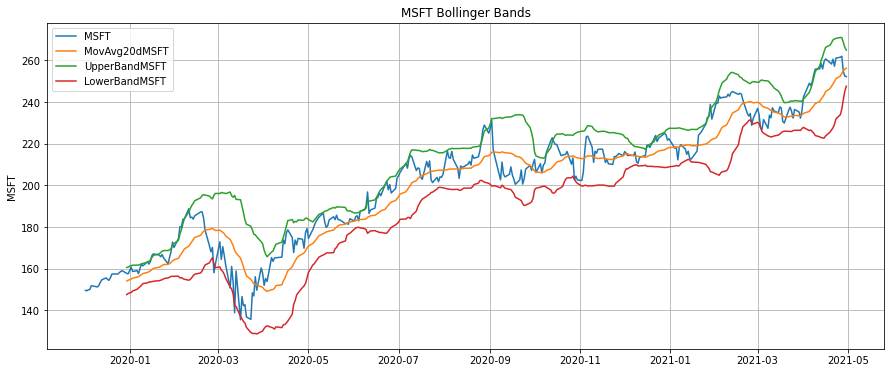

In [10]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
stock_closing_prices_df["UpperBandMSFT"] = stock_closing_prices_df["MovAvg20dMSFT"] + (stock_closing_prices_df["StDevMSFT"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
stock_closing_prices_df["LowerBandMSFT"] = stock_closing_prices_df["MovAvg20dMSFT"] - (stock_closing_prices_df["StDevMSFT"] * 2)

# Plotting
stock_closing_prices_df[["MSFT","MovAvg20dMSFT","UpperBandMSFT","LowerBandMSFT"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("MSFT Bollinger Bands")
plt.axis("tight")
plt.ylabel("MSFT")

Text(0, 0.5, 'DIS')

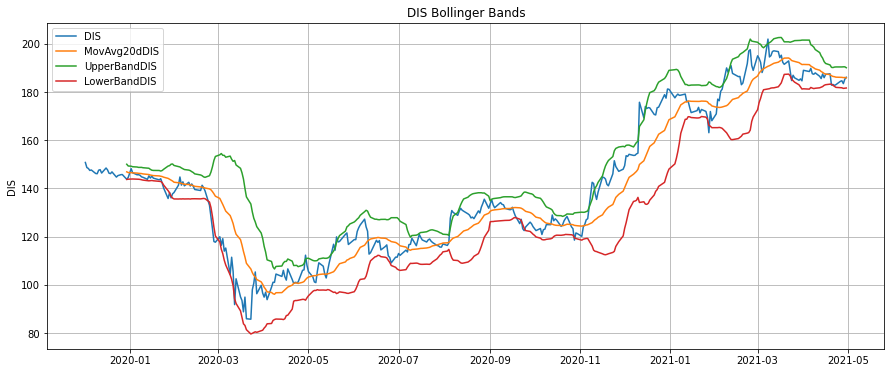

In [11]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
stock_closing_prices_df["UpperBandDIS"] = stock_closing_prices_df["MovAvg20dDIS"] + (stock_closing_prices_df["StDevDIS"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
stock_closing_prices_df["LowerBandDIS"] = stock_closing_prices_df["MovAvg20dDIS"] - (stock_closing_prices_df["StDevDIS"] * 2)

# Plotting
stock_closing_prices_df[["DIS","MovAvg20dDIS","UpperBandDIS","LowerBandDIS"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("DIS Bollinger Bands")
plt.axis("tight")
plt.ylabel("DIS")

Text(0, 0.5, 'MA')

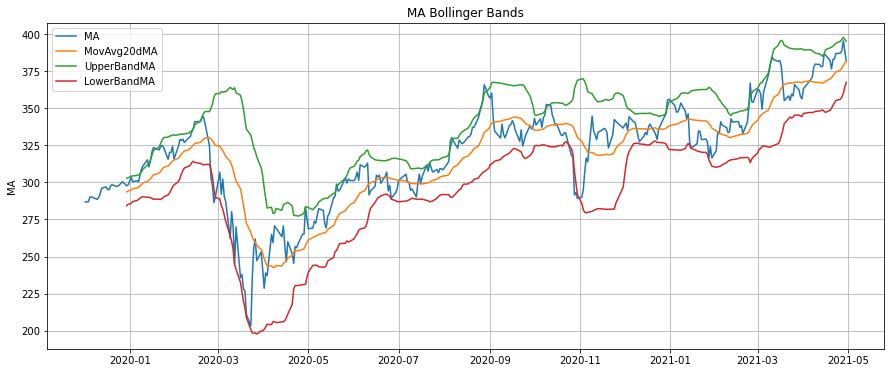

In [12]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
stock_closing_prices_df["UpperBandMA"] = stock_closing_prices_df["MovAvg20dMA"] + (stock_closing_prices_df["StDevMA"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
stock_closing_prices_df["LowerBandMA"] = stock_closing_prices_df["MovAvg20dMA"] - (stock_closing_prices_df["StDevMA"] * 2)

# Plotting
stock_closing_prices_df[["MA","MovAvg20dMA","UpperBandMA","LowerBandMA"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("MA Bollinger Bands")
plt.axis("tight")
plt.ylabel("MA")

Text(0, 0.5, 'NFLX')

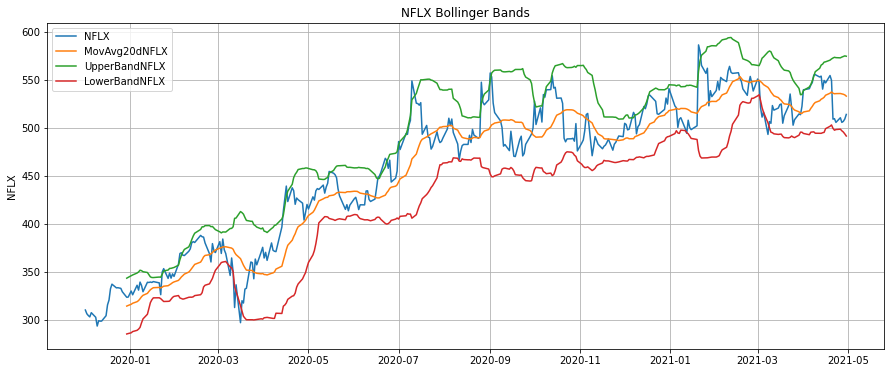

In [13]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
stock_closing_prices_df["UpperBandNFLX"] = stock_closing_prices_df["MovAvg20dNFLX"] + (stock_closing_prices_df["StDevNFLX"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
stock_closing_prices_df["LowerBandNFLX"] = stock_closing_prices_df["MovAvg20dNFLX"] - (stock_closing_prices_df["StDevNFLX"] * 2)

# Plotting
stock_closing_prices_df[["NFLX","MovAvg20dNFLX","UpperBandNFLX","LowerBandNFLX"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("NFLX Bollinger Bands")
plt.axis("tight")
plt.ylabel("NFLX")

Text(0, 0.5, 'XOM')

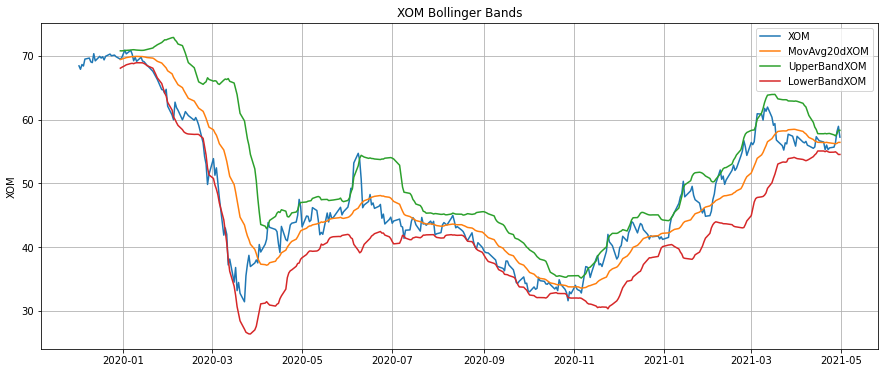

In [14]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
stock_closing_prices_df["UpperBandXOM"] = stock_closing_prices_df["MovAvg20dXOM"] + (stock_closing_prices_df["StDevXOM"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
stock_closing_prices_df["LowerBandXOM"] = stock_closing_prices_df["MovAvg20dXOM"] - (stock_closing_prices_df["StDevXOM"] * 2)

# Plotting
stock_closing_prices_df[["XOM","MovAvg20dXOM","UpperBandXOM","LowerBandXOM"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("XOM Bollinger Bands")
plt.axis("tight")
plt.ylabel("XOM")